# Eye of the Emergency

## Libraries and dataset import

In [1]:
# Data import & Exploring
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

# 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import string
import re

from sklearn.feature_extraction.text import CountVectorizer

# ML
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import xgboost as xgb

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utile\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\utile\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
train_df = pd.read_csv('train_tweets.csv')
test_df = pd.read_csv('test_tweets.csv')

## Data Preprocess

In [3]:
unique_count = pd.DataFrame(pd.value_counts(train_df.text))
unique_count = unique_count.reset_index()
unique_count.columns = ['text', 'count']

In [4]:
#unique_count.head()

In [5]:
train_df_unique = pd.DataFrame(train_df.text.unique(), columns = ['text'])

In [6]:
#train_df_unique.head()

In [7]:
train_df_unique = train_df_unique.merge(unique_count)

In [8]:
#train_df_unique.head()

In [9]:
train_df_count = train_df.merge(unique_count)

In [10]:
#train_df_count.head()

In [11]:
lg = pd.DataFrame([len(txt) for txt in train_df.text], columns = ['len_text'])

In [12]:
#lg.head()

In [13]:
train_df_len = pd.concat([train_df_count, lg], axis = 1)

In [14]:
#train_df_len.head()

### Location Encoder

In [15]:
encode_location = pd.DataFrame([int(type(ct)==str) for ct in train_df_len.location], columns=['location_enc'])

In [16]:
#encode_location.head()

In [17]:
train_df_location = pd.concat([train_df_len, encode_location], axis=1)

In [18]:
train_df_location.head()

,id,keyword,location,text,target,count,len_text,location_enc
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,69,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1,38,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1,133,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,65,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1,88,0


## NLTK

In [19]:
df = train_df_location.copy()

In [20]:
df2 = train_df_location.copy()

In [21]:
# text cleaning

def text_processing(text):
     #Charger les stop-words en anglais
    stop_words = set(stopwords.words('english'))

    # Initialiser le lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Appliquer la tokenisation à tous les textes
    tokens = word_tokenize(text.lower())

    # Supprimer les ponctuations
    tokens = [word for word in tokens if word not in string.punctuation]
    

    # Supprimer les stop-words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Supprimer les stop-words BIS
    tokens = [word for word in tokens if word[0:4] != "http"]
    tokens = [word for word in tokens if word[0:7] != "//t.co/"]
    

    # Appliquer la lemmatisation à tous les tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    
    # Supprimer les stop-words après lemmatisation
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [word for word in tokens if word[0] != "'"]
    tokens = [word for word in tokens if word != "n't"]
    tokens = [word for word in tokens if word != "amp"]
    
    tokens = [word for word in tokens if word[0:len("\x89")] != "\x89"]
    tokens = [word for word in tokens if word[0:len("Û_")] != "Û_"]
    tokens = [word for word in tokens if word[0:len("Û")] != "Û"]
    
    tokens = ' '.join(tokens)
    
    return tokens
    

# Charger l'ensemble de données
#df = pd.read_csv('votre_fichier.csv')

In [22]:
# Appliquer la fonction Cleanup à tous les textes dans la colonne "text"
df2['text_process'] = df['text'].apply(text_processing)

In [23]:
#df2

In [24]:
text_process = [txt for txt in df2.text_process]
text_process_0 = [txt for txt in df2.text_process[df.target == 0]]
text_process_1 = [txt for txt in df2.text_process[df.target == 1]]

In [25]:
#text_process

In [26]:
my_lst_str = ' '.join(map(str, text_process))
my_lst_str_0 = ' '.join(map(str, text_process_0))
my_lst_str_1 = ' '.join(map(str, text_process_1))

In [27]:
#my_lst_str

In [28]:
from wordcloud import WordCloud

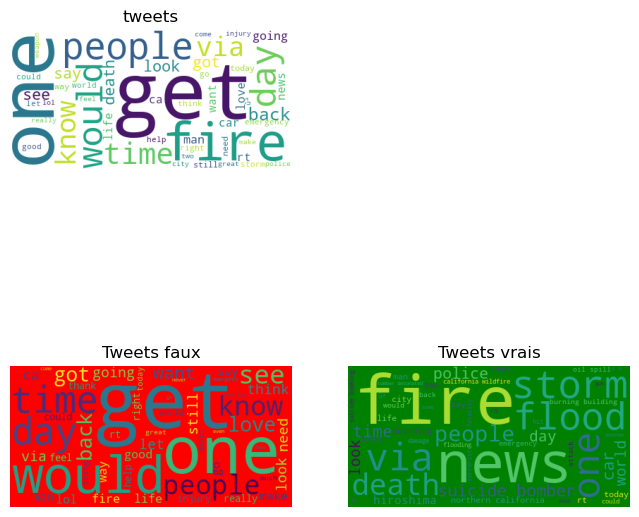

In [81]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)

wordcloud = WordCloud(background_color = 'white', stopwords = ["Û_", "new", "like"] , max_words = 50).generate(my_lst_str)
plt.imshow(wordcloud)

plt.title('tweets')
plt.axis("off")

plt.subplot(2, 2, 3)

wordcloud_0 = WordCloud(background_color = 'red', stopwords = ["Û_", "new", "like"] , max_words = 50).generate(my_lst_str_0)
plt.imshow(wordcloud_0)

plt.title('Tweets faux')
plt.axis("off")


plt.subplot(2, 2, 4)

wordcloud_1 = WordCloud(background_color = 'green', stopwords = ["Û_", "new", "like"] , max_words = 50).generate(my_lst_str_1)
plt.imshow(wordcloud_1)

plt.title('Tweets vrais')
plt.axis("off")

plt.show()

In [30]:
#wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(my_lst_str)

In [31]:
#plt.figure(figsize=(8, 8))

#plt.imshow(wordcloud)

## ML : Word Embedding - SKLEARN

In [32]:
X = df2['text_process']

In [33]:
X

0                deed reason earthquake may allah forgive
1                   forest fire near la ronge sask canada
2       resident asked place notified officer evacuati...
3       13,000 people receive wildfire evacuation orde...
4       got sent photo ruby alaska smoke wildfire pour...
                              ...                        
7608    worldnews fallen powerlines link tram update f...
7609    flip side walmart bomb everyone evacuate stay ...
7610    suicide bomber kill 15 saudi security site mos...
7611    two giant crane holding bridge collapse nearby...
7612    latest home razed northern california wildfire...
Name: text_process, Length: 7613, dtype: object

In [34]:
#vectorizer = CountVectorizer()
#X_vec = vectorizer.fit_transform(X)

In [35]:
#pd.DataFrame(X_vec)

In [36]:
tfidf = TfidfVectorizer()

In [37]:
#X_train_vec = tfidf.fit_transform(df2['text'].to_numpy())

In [38]:
#pd.DataFrame(X_train_vec).head()

In [39]:
X_vec = tfidf.fit_transform(X)

In [40]:
#X_vec

In [41]:
pd.DataFrame(X_vec)

,0
0,"(0, 5629)\t0.49148562905784154\n (0, 991)\t..."
1,"(0, 2600)\t0.38765789061416633\n (0, 12153)..."
2,"(0, 5135)\t0.28974659219094845\n (0, 10162)..."
3,"(0, 2561)\t0.276987017155563\n (0, 15248)\t..."
4,"(0, 12223)\t0.27148235929883796\n (0, 10845..."
...,...
7608,"(0, 14220)\t0.35355670412258916\n (0, 5044)..."
7609,"(0, 14999)\t0.38412404752986196\n (0, 14421..."
7610,"(0, 2173)\t0.2539839080697761\n (0, 14997)\..."
7611,"(0, 9598)\t0.37050742077868265\n (0, 6700)\..."


In [42]:
feature_names = tfidf.get_feature_names()

C:\Users\utile\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
#feature_names

In [44]:
#for col in X_train_vec.nonzero()[1]:
 #   print (feature_names[col], ' - ', X_train_vec[0, col])

## ML : Dataset Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, df2['target'], test_size=0.2, random_state=42)


## ML : SVM avec sklearn

In [46]:
#instanciation
model_SVC = SVC() #kernel = 'linear', gamma = 'scale', shrinking = False)

In [47]:
#training
model_SVC.fit(X_train, y_train)

SVC()

In [48]:
#calcul de la précision
model_SVC.score(X_test, y_test)

0.8082731451083388

In [49]:
def fonction_SVM(tweet):
    tw = []
    tw.append(tweet)
    #Prédiction
    X_1 = pd.Series([tweet])
    X_1 = tfidf.transform(X_1)
    pred = model_SVC.predict(X_1)

    #affichage des résultats
    resultat = "Résultat : "
    if pred[0] == 0:
        resultat = resultat + "NO DISASTER"
    if pred[0] == 1:
        resultat = resultat + "DISASTER"
        
    return resultat

In [50]:
#Prédiction
fonction_SVM("Help me, my house is on fire and all the forest is burning")

'Résultat : DISASTER'

In [51]:
#Prédiction
fonction_SVM("forest love")

'Résultat : NO DISASTER'

In [52]:
#Prédiction
fonction_SVM("beautiful forest")

'Résultat : NO DISASTER'

In [53]:
#Prédiction
fonction_SVM("the floor is on fire i love disco")

'Résultat : NO DISASTER'

## ML : xgboost

The data is stored in a DMatrix object.

In [54]:
X_train

<6090x15718 sparse matrix of type '<class 'numpy.float64'>'
	with 54582 stored elements in Compressed Sparse Row format>

In [55]:
pd.DataFrame(X_train).head()

,0
0,"(0, 496)\t0.37641878497473147\n (0, 4192)\t..."
1,"(0, 4892)\t0.40461246822950253\n (0, 7035)\..."
2,"(0, 3010)\t0.3260889900992241\n (0, 3438)\t..."
3,"(0, 2797)\t0.23063019194083212\n (0, 3368)\..."
4,"(0, 1068)\t0.20937047805631437\n (0, 1404)\..."


In [56]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [57]:
# Create regression matrices
#dtrain = xgb.DMatrix(X_train)

In [58]:
# Create regression matrices
dtrain = xgb.DMatrix(X_train, y_train)#, enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test) #, enable_categorical=True)
np.asarray(dtest)

array(<xgboost.core.DMatrix object at 0x000001B8965E4F40>, dtype=object)

In [59]:
# Define hyperparameters
param = {'objective': 'binary:logistic', 'eval_metric': 'auc'}

In [60]:
# Define hyperparameters
model_xgb = xgb.train(param, dtrain, num_boost_round=10)

In [61]:
ypred = model_xgb.predict(dtest)

In [62]:
def fonction_XGB(tweet):
    tw = []
    tw.append(tweet)
    #Prédiction
    X_1 = pd.Series([tweet])
    X_1 = tfidf.transform(X_1)
    X_1 = xgb.DMatrix(X_1)
    pred = model_xgb.predict(X_1)

    #affichage des résultats
    resultat = "Résultat : "
    if pred[0] < 0.5:
        resultat = resultat + "NO DISASTER"
    if pred[0] >= 0.5:
        resultat = resultat + "DISASTER"
        
    return resultat

In [63]:
#Prédiction
fonction_XGB("Help me, my house is on fire and all the forest is burning")

'Résultat : DISASTER'

In [64]:
#Prédiction
fonction_XGB("Hello the forest is on love")

'Résultat : NO DISASTER'

In [65]:
ypred = [round(pred) for pred in ypred]

In [66]:
accuracy = round(sum(ypred == y_test) / len(y_test), 2)
print('Accuracy: ', accuracy)

Accuracy:  0.72


## ML : SKL Log Reg

In [67]:
X_train_arr = np.asarray(X_train.toarray())

In [68]:
X_train_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
#X_train_arr_df = pd.DataFrame(X_train_arr)

In [70]:
#X_train_arr_df.describe()

In [71]:
#model_logreg = sm.Logit(y_train, X_train_arr)

In [72]:
#result = model_logreg.fit()

In [73]:
#result.summary2()

In [74]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)

y_pred = model_logreg.predict(X_test)

In [76]:
print('Model accuracy (%) : {:.1f}'.format(model_logreg.score(X_test, y_test) * 100))

Model accuracy (%) : 81.5


In [78]:
roc_auc = roc_auc_score(y_test, model_logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, model_logreg.predict_proba(X_test)[:,1])

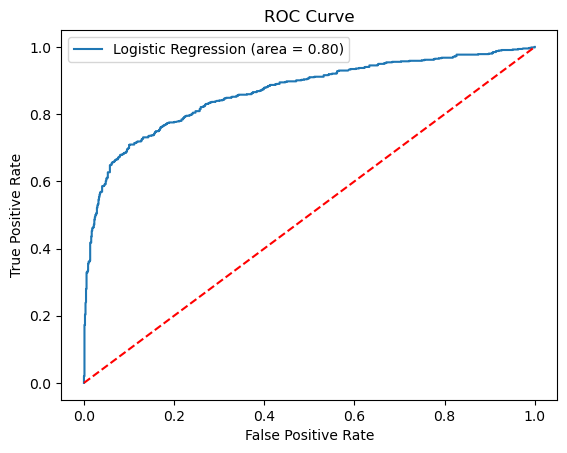

In [79]:
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()